 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
#create Path for whale_returns file
whale_path = Path("../HW4/whale_returns.csv")

#Read the whale_returns file into a dataframe using pandas 
whale_df = pd.read_csv(whale_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

# sort DataFrame in ascending order by the Date
whale_df.sort_index()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df = whale_df.dropna()

# Validate null values have been dropped
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
# create path for algo_returns.csv
algo_path = Path("../HW4/algo_returns.csv")

# Read algo_returns.csv into data frame
algo_df = pd.read_csv(algo_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

# sort DataFrame in ascending order by the Date
algo_df.sort_index()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
# determine number of nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df = algo_df.dropna()

# Validate null values have been dropped
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
# create path for sp500_history.csv
sp500_path = Path("../HW4/sp500_history.csv")

# read in sp500_history file into a dataframe
sp500_df = pd.read_csv(sp500_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

# sort DataFrame in ascending order by the Date
sp500_df.sort_index()
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
#replace '$' with ''
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')

# change 'Close' data type to float
sp500_df['Close'] = sp500_df['Close'].astype('float')

In [11]:
# Calculate Daily Returns
sp500_df['Close'] = sp500_df['Close'].pct_change()
sp500_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
sp500_df = sp500_df.dropna()

# Validate null values have been dropped
sp500_df.isnull().sum()

Close    0
dtype: int64

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df = sp500_df.rename(columns={'Close':'S&P 500'})
sp500_df.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
whale_df.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [15]:
algo_df.count()

Algo 1    1235
Algo 2    1235
dtype: int64

In [16]:
sp500_df.count()

S&P 500    1648
dtype: int64

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

daily_returns = pd.concat([whale_df, algo_df, sp500_df], axis='columns', join='inner')
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

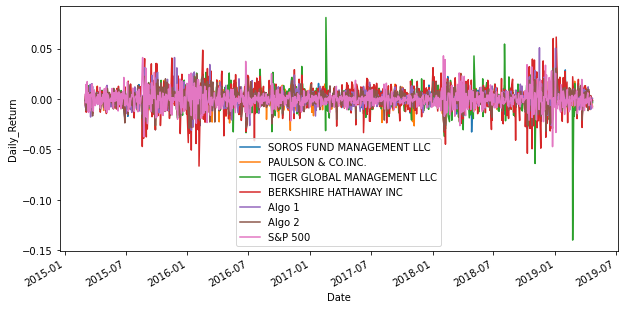

In [18]:
# Plot daily returns of all portfolios
daily_returns_plot = daily_returns.plot(ylabel='Daily_Return', legend=True, figsize=(10,5))

#### Calculate and Plot cumulative returns.

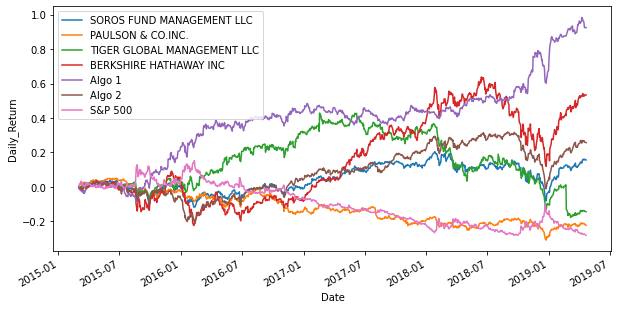

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+daily_returns).cumprod()-1

# Plot cumulative returns
cumulative_returns_plot = cumulative_returns.plot(ylabel='Daily_Return', figsize=(10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:ylabel='Daily_Return'>

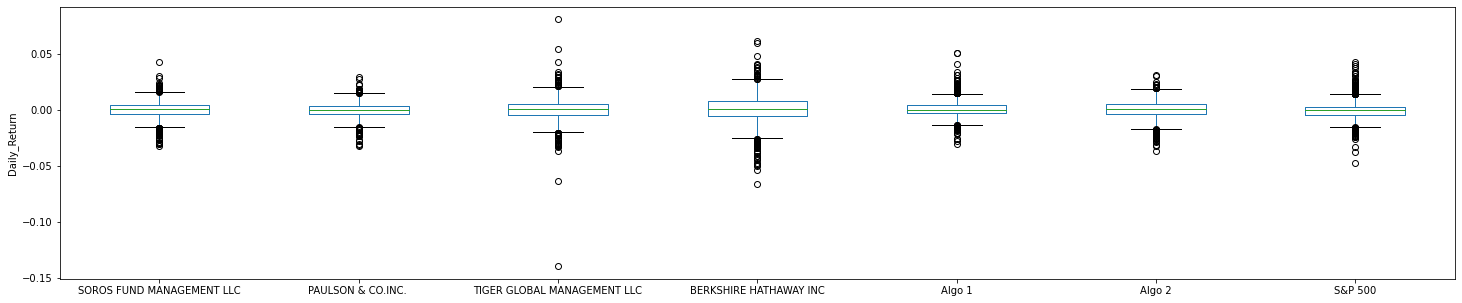

In [20]:
# Box plot to visually show risk
daily_returns.plot.box(ylabel='Daily_Return', figsize=(25,5))

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
daily_std = daily_returns.std()

#sort daily_std in descending order
daily_std = daily_std.sort_values(ascending=False)
daily_std.head()

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P 500                        0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = daily_returns['S&P 500'].std()

# Determine which portfolios are riskier than the S&P 500
print("Portfolio's riskier than S&P 500")
print("---------------------------------")

#loop through std series and compare each portfolio std to that of the S&P 500
for index, value in daily_std.items():
    if sp500_std < value:
        print(f"{index} Std: {value}") 

Portfolio's riskier than S&P 500
---------------------------------
BERKSHIRE HATHAWAY INC Std: 0.012918753062201834
TIGER GLOBAL MANAGEMENT LLC Std: 0.010897305414583383


### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P 500                        0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

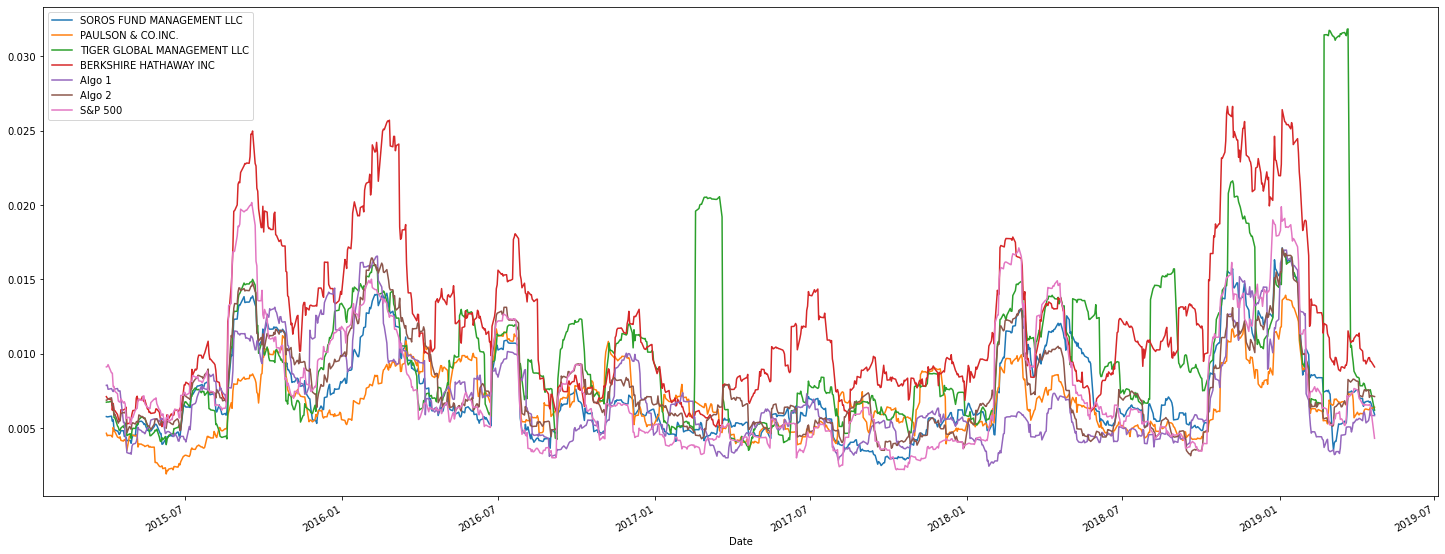

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = daily_returns.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std_plot = rolling_std.plot(figsize=(25, 10))

### Calculate and plot the correlation

<AxesSubplot:>

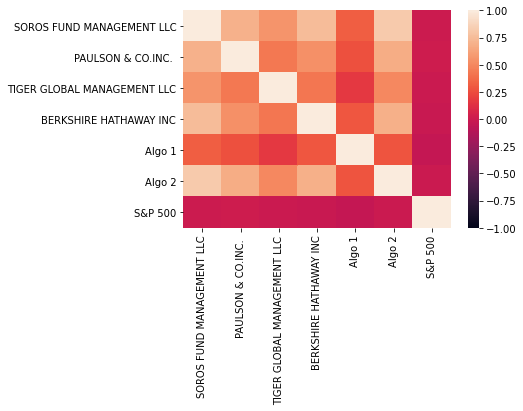

In [25]:
# Calculate the correlation
correlation = daily_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 2'}, xlabel='Date'>

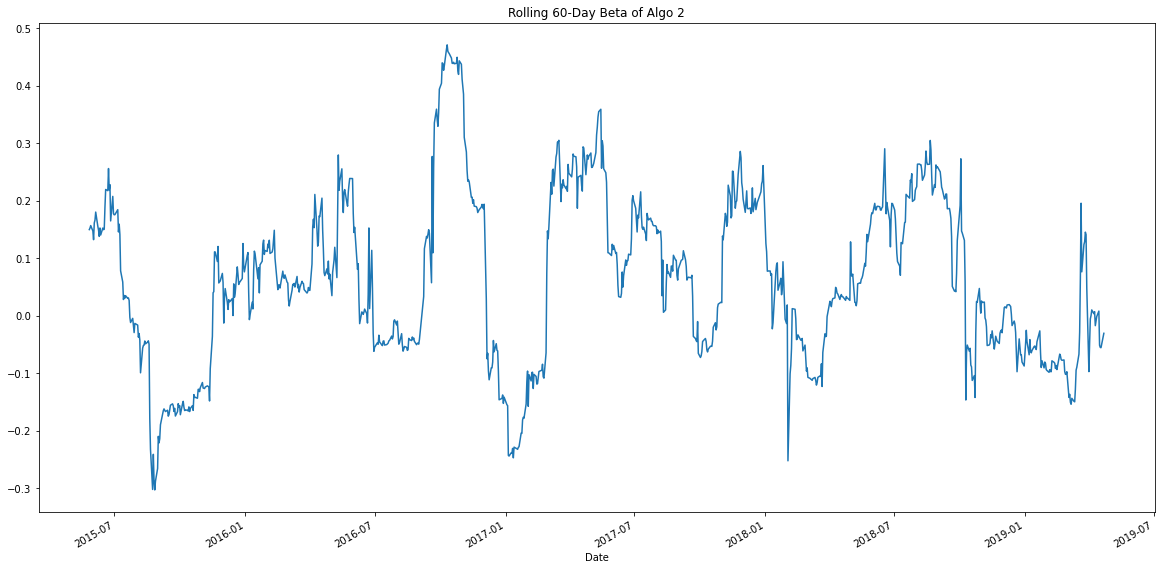

In [26]:
# Calculate covariance of a single portfolio
algo2_cov = daily_returns['Algo 2'].cov(daily_returns['S&P 500'])

# Calculate variance of S&P 500?
sp500_var = daily_returns['S&P 500'].var()

# Computing beta
algo2_beta = algo2_cov / sp500_var

# Plot 60 day rolling beta trend
rolling_covariance = daily_returns['Algo 2'].rolling(window=60).cov(daily_returns['S&P 500'])
rolling_variance = daily_returns['S&P 500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 2')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [27]:
# Use `ewm` to calculate the rolling window
algo2_ewm = daily_returns['S&P 500'].ewm(halflife=21)
algo2_ewm

ExponentialMovingWindow [com=29.799346392775035,min_periods=1,adjust=True,ignore_na=False,axis=0]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [68]:
# Annualized Sharpe Ratios
sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

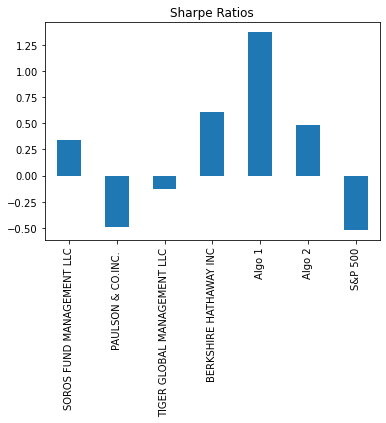

In [69]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

--- Both Algo 1 and Algo 2 outperform the S&P 500

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [30]:
# Reading data from 1st stock
goog_path = Path("../HW4/goog_historical.csv")

#Read the whale_returns file into a dataframe using pandas 
goog_df = pd.read_csv(goog_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)

# sort DataFrame in ascending order by the Date
goog_df.sort_index()
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [31]:
# Reading data from 2nd stock
aapl_path = Path("../HW4/aapl_historical.csv")

#Read the whale_returns file into a dataframe using pandas 
aapl_df = pd.read_csv(aapl_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)

# sort DataFrame in ascending order by the Date
aapl_df.sort_index()
aapl_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [32]:
# Reading data from 3rd stock
cost_path = Path("../HW4/cost_historical.csv")

#Read the whale_returns file into a dataframe using pandas 
cost_df = pd.read_csv(cost_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)

# sort DataFrame in ascending order by the Date
cost_df.sort_index()
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [33]:
# Combine all stocks in a single DataFrame
stocks_combined = pd.concat([goog_df, aapl_df, cost_df], axis='columns', join='inner')
stocks_combined.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,GOOG,1162.38,AAPL,200.72,COST,243.47
2019-05-08,GOOG,1166.27,AAPL,202.90,COST,241.34
2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18
2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62


In [34]:
# Reset Date index
stocks_combined.reset_index()

,Trade DATE,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
0,2019-05-09,GOOG,1162.38,AAPL,200.72,COST,243.47
1,2019-05-08,GOOG,1166.27,AAPL,202.90,COST,241.34
2,2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18
3,2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
4,2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62
...,...,...,...,...,...,...,...
245,2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60
246,2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
247,2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
248,2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88


In [35]:
# Reorganize portfolio data by having a column per symbol

# Delete Symbol columns
stocks_combined = stocks_combined.drop(columns=["Symbol", "Symbol", "Symbol"])

# Rename NOCP columns to match stock ticker
columns = ["GOOG", "AAPL", "COST"]
stocks_combined.columns = columns

stocks_combined.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [36]:
# Calculate daily returns
stocks_daily_returns = stocks_combined.pct_change()

# Drop NAs
stocks_daily_returns = stocks_daily_returns.dropna()

# Display sample data
stocks_daily_returns.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597
2019-05-02,-0.019226,-0.012279,-0.007890


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [52]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = stocks_daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [41]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolio_returns = pd.concat([daily_returns, portfolio_returns], axis='columns', join='inner')
all_portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,-0.000012
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.010216
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.009283
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.001618
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.006112


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolio_returns = all_portfolio_returns.dropna()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [53]:
# Calculate the annualized `std`

#calculate std of all portoflios
daily_std_all = all_portfolio_returns.std()

#sort daily_std in descending order
daily_std_all = daily_std_all.sort_values(ascending=False)

#calculate annualized std
annualized_std = daily_std_all * np.sqrt(252)
annualized_std.head()

BERKSHIRE HATHAWAY INC         0.246819
TIGER GLOBAL MANAGEMENT LLC    0.232434
0                              0.213137
S&P 500                        0.152147
SOROS FUND MANAGEMENT LLC      0.146589
dtype: float64

### Calculate and plot rolling `std` with 21-day window

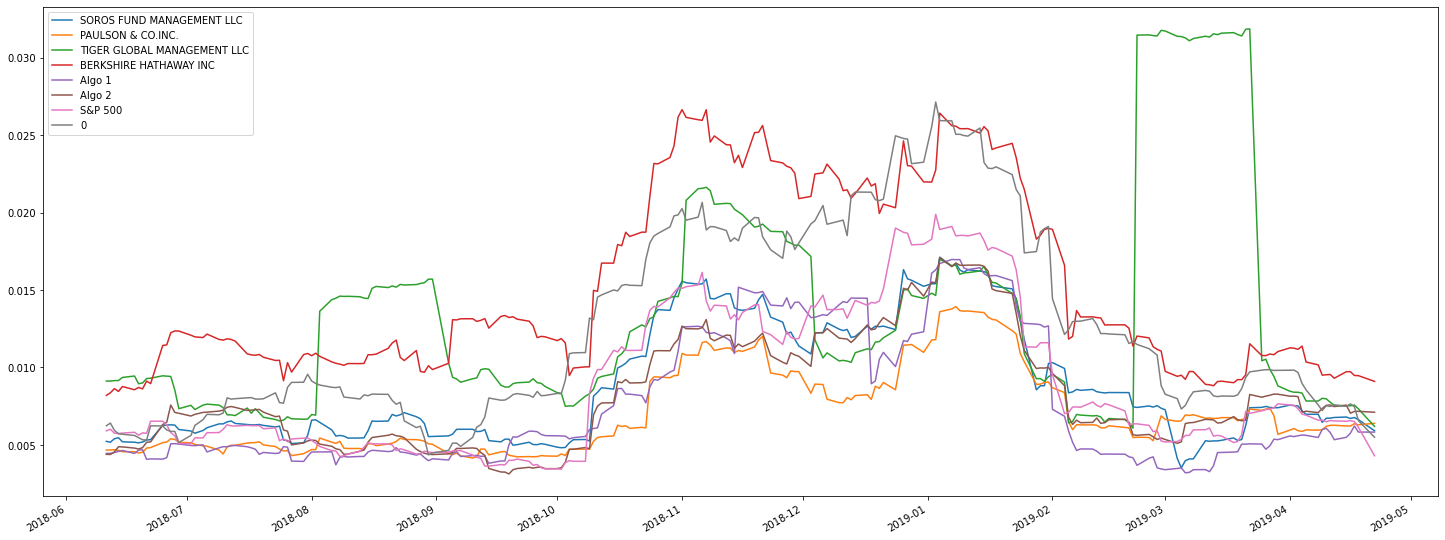

In [54]:
# Calculate rolling standard deviation
rolling_std_all = all_portfolio_returns.rolling(window=21).std()

# Plot rolling standard deviation
rolling_std_plot_all = rolling_std_all.plot(figsize=(25, 10))

### Calculate and plot the correlation

<AxesSubplot:>

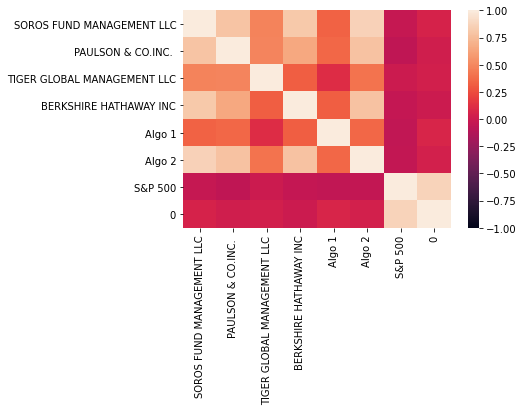

In [55]:
# Calculate and plot the correlation
correlation_all = all_portfolio_returns.corr()

# Plot
sns.heatmap(correlation_all, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Portfolio'}>

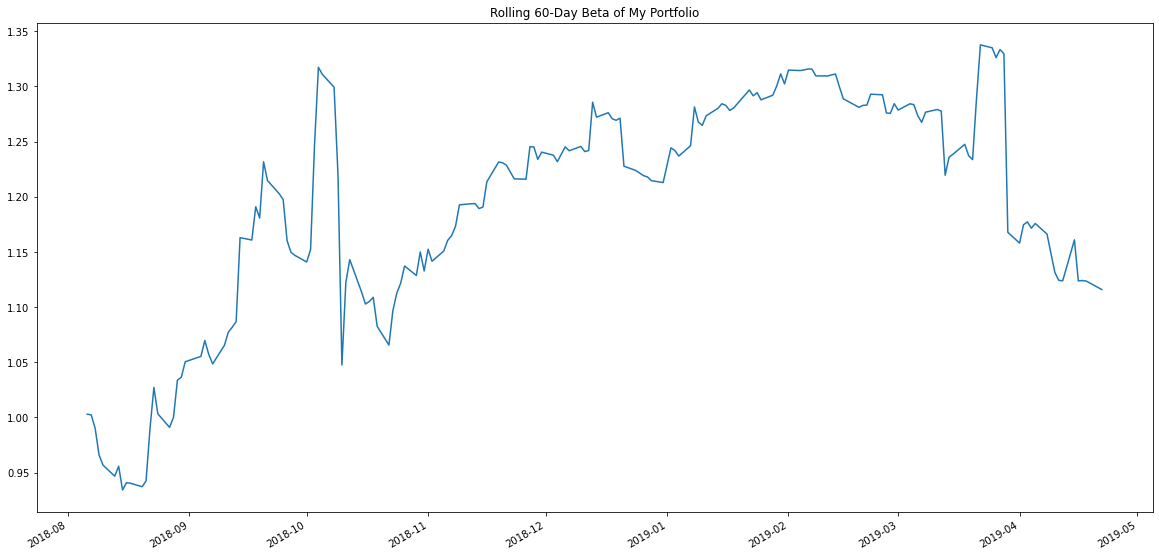

In [63]:
# Calculate and plot rolling 60 day Beta
rolling_covariance = all_portfolio_returns[0].rolling(window=60).cov(daily_returns['S&P 500'])
rolling_variance = daily_returns['S&P 500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [74]:
# Calculate Annualzied Sharpe Ratios
all_std_annual = all_portfolio_returns.std() * np.sqrt(252)
sharpe_ratios = (all_portfolio_returns.mean() * 252) / (all_std_annual)


<AxesSubplot:title={'center':'Sharpe Ratios'}>

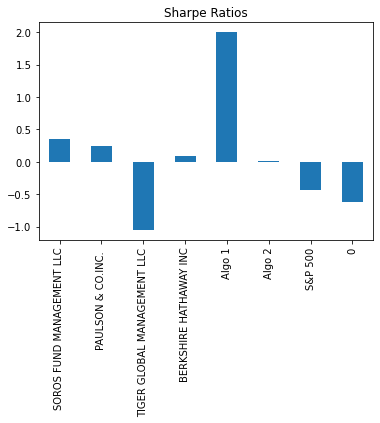

In [75]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
My portfolio is has a smaller sharpe ratio than that of the S&P 500 so it performs worse (?)